In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow-io --no-deps

In [3]:
!pip install --upgrade tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 40.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
    Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.31.0
    Uninstalling tensorflow-io-0.31.0:
      Successfully uninstalled tensorflow-io-0.31.0


In [2]:
import tensorflow as tf
import os
import random
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from keras.applications import Xception
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [6]:
base_dir = '/kaggle/input/calorifydata/Calorify/dataset (3)'
data_dir = '/kaggle/input/calorifydata/Calorify/dataset (3)/dataset'

In [7]:
filepaths=[]
labels=[]
allowed_extensions = ['jpg', '.png', '.jpeg', '.jpg'] 
classlist=os.listdir(data_dir)
for img_class in classlist:
    classpath=os.path.join(data_dir,img_class)
    if os.path.isdir(classpath):
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(img_class)                   
Fseries= pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')    
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print (df['labels'].value_counts())

                                           filepaths     labels
0  /kaggle/input/calorifydata/Calorify/dataset (3...  croissant
1  /kaggle/input/calorifydata/Calorify/dataset (3...  croissant
2  /kaggle/input/calorifydata/Calorify/dataset (3...  croissant
3  /kaggle/input/calorifydata/Calorify/dataset (3...  croissant
4  /kaggle/input/calorifydata/Calorify/dataset (3...  croissant
rice             621
ice_cream        400
chicken_curry    400
onion_rings      400
pancakes         400
hot_dog          400
pizza            400
sushi            400
chicken_wings    400
steak            400
seaweed_salad    400
french_fries     400
waffles          400
hamburger        400
ramen            400
donuts           400
bibimbap         400
sandwiches       164
croissant        121
popcorn          117
ayam bakar       115
nasi goreng      111
nasi padang      110
gulai            103
Name: labels, dtype: int64


In [4]:
import os
import random
from shutil import copyfile
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/kaggle/input/calorifydata/Calorify/dataset (3)/dataset"
output_dir = "/kaggle/working/target"
split_size = 0.8
image_size = (224, 224)
batch_size = 25

# Step 1: Read file paths and labels
filepaths = []
labels = []
allowed_extensions = ['jpg', '.png', '.jpeg', '.jpg']
classlist = os.listdir(data_dir)

for img_class in classlist:
    classpath = os.path.join(data_dir, img_class)
    if os.path.isdir(classpath):
        flist = os.listdir(classpath)
        for f in flist:
            fpath = os.path.join(classpath, f)
            file_extension = os.path.splitext(fpath)[1].lower()
            if file_extension in allowed_extensions:
                filepaths.append(fpath)
                labels.append(img_class)

# Step 2: Create DataFrame from file paths and labels
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

In [5]:
# Step 3: Split dataset into training and validation
train_dir = os.path.join(output_dir, "training")
valid_dir = os.path.join(output_dir, "validation")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

categories = df['labels'].unique()

for category in categories:
    category_df = df[df['labels'] == category]
    images = category_df['filepaths'].tolist()
    random.shuffle(images)

    jml_images = len(images)
    jml_train = int(jml_images * split_size)

    train_images = images[:jml_train]
    valid_images = images[jml_train:]

    for image in train_images:
        this_file = image
        destination = os.path.join(train_dir, category, os.path.basename(image))
        os.makedirs(os.path.dirname(destination), exist_ok=True)
        copyfile(this_file, destination)

    for image in valid_images:
        this_file = image
        destination = os.path.join(valid_dir, category, os.path.basename(image))
        os.makedirs(os.path.dirname(destination), exist_ok=True)
        copyfile(this_file, destination)

    print(f"Kategori: {category}")
    print(f"Original jumlah gambar {jml_images}")
    print(f"Jumlah Gambar Train: {len(train_images)}")
    print(f"Jumlah Gambar Validasi: {len(valid_images)}")

Kategori: croissant
Original jumlah gambar 120
Jumlah Gambar Train: 96
Jumlah Gambar Validasi: 24
Kategori: seaweed_salad
Original jumlah gambar 400
Jumlah Gambar Train: 320
Jumlah Gambar Validasi: 80
Kategori: bibimbap
Original jumlah gambar 400
Jumlah Gambar Train: 320
Jumlah Gambar Validasi: 80
Kategori: donuts
Original jumlah gambar 400
Jumlah Gambar Train: 320
Jumlah Gambar Validasi: 80
Kategori: ayam bakar
Original jumlah gambar 114
Jumlah Gambar Train: 91
Jumlah Gambar Validasi: 23
Kategori: ramen
Original jumlah gambar 400
Jumlah Gambar Train: 320
Jumlah Gambar Validasi: 80
Kategori: hamburger
Original jumlah gambar 400
Jumlah Gambar Train: 320
Jumlah Gambar Validasi: 80
Kategori: popcorn
Original jumlah gambar 116
Jumlah Gambar Train: 92
Jumlah Gambar Validasi: 24
Kategori: nasi padang
Original jumlah gambar 109
Jumlah Gambar Train: 87
Jumlah Gambar Validasi: 22
Kategori: waffles
Original jumlah gambar 400
Jumlah Gambar Train: 320
Jumlah Gambar Validasi: 80
Kategori: gulai
Ori

In [8]:
image_size = (224, 224)
batch_size = 25

train_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

#test_datagen = ImageDataGenerator(rescale=1./255)
#test_generator = test_datagen.flow_from_directory(
#    test_dir,
#    target_size=image_size,
#    batch_size=batch_size,
#   class_mode='categorical',
#)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 6281 images belonging to 24 classes.
Found 1573 images belonging to 24 classes.


In [9]:
def show_image_samples(gen):
    classes = train_generator.class_indices
    class_names = list(classes.keys())

    images, labels = next(gen)  # Get a sample batch from the generator
    plt.figure(figsize=(20, 20))
    length = len(labels)
    if length < 25:  # Show a maximum of 25 images
        r = length
    else:
        r = 25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = images[i]
        plt.imshow(image)
        index = np.argmax(labels[i])
        class_name = class_names[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()


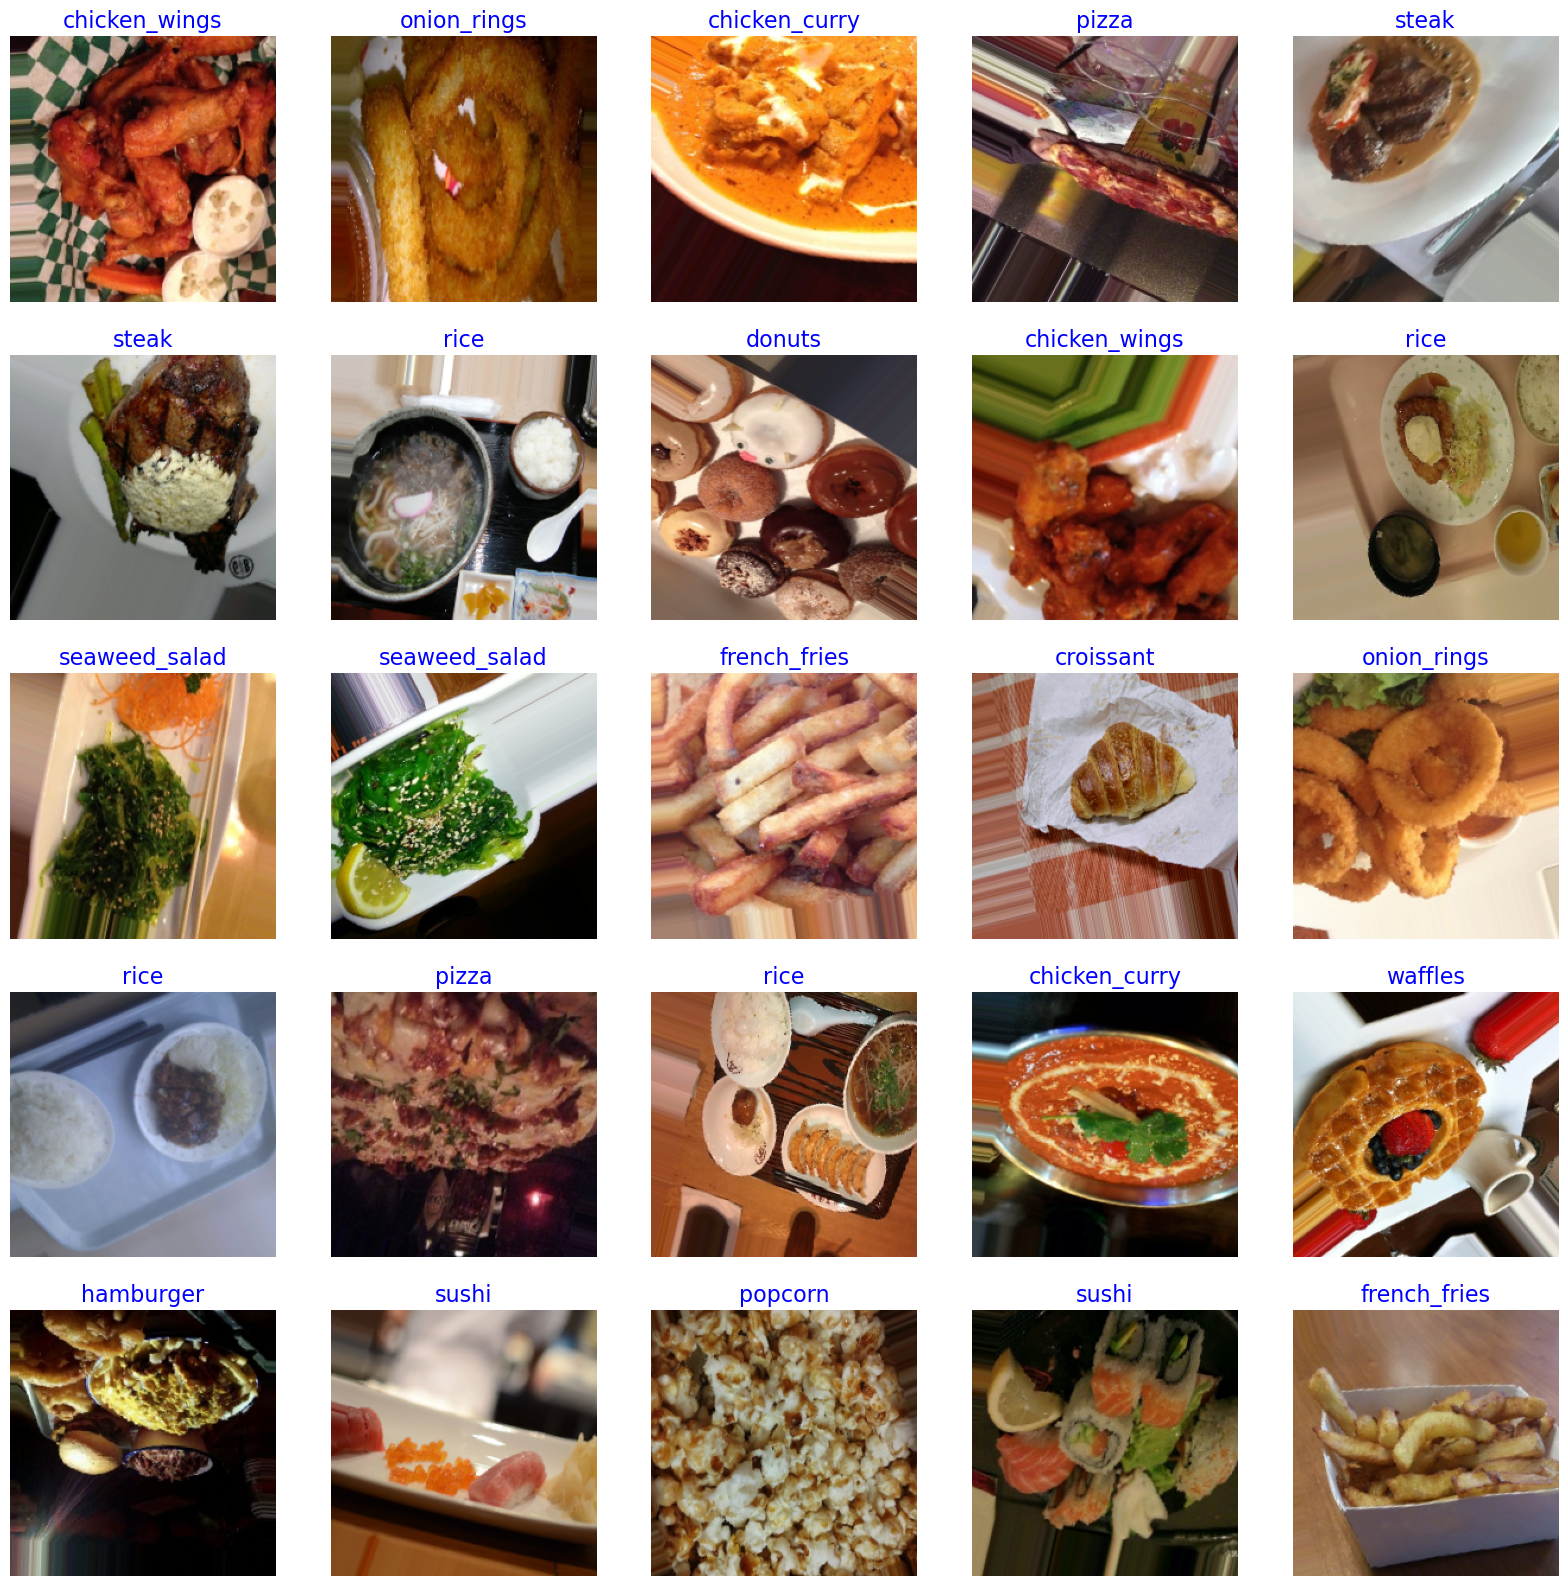

In [10]:
show_image_samples(train_generator)

In [11]:
from keras.applications import Xception
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Mendefinisikan jumlah kelas yang ada dalam dataset
input_shape = (224, 224, 3)
num_classes = len(train_generator.class_indices)

# Membuat model dasar menggunakan pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Menambahkan lapisan global average pooling dan lapisan terhubung penuh
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(768, activation='relu')(x)
x = Dropout(0.5)(x)  # Menambahkan lapisan Dropout dengan tingkat dropout 0.5
predictions = Dense(num_classes, activation='softmax')(x)

# Menggabungkan model dasar dengan lapisan yang baru ditambahkan
model = Model(inputs=base_model.input, outputs=predictions)

# Menyimpan lapisan model dasar agar tidak ikut dilatih
for layer in base_model.layers:
    layer.trainable = False

# Menentukan optimizer dan compile model
optimizer = Adam(learning_rate=0.001)  # Gunakan learning_rate sebagai ganti dari lr
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

83683744/83683744 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                      

In [12]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#import math
epochs=50
verbose = 1

#total_samples = len(train_generator)*train_generator.batch_size
#steps_per_epoch = math.ceil(total_samples/batch_size)

# Callback untuk memberhentikan pelatihan jika val_accuracy tidak meningkat dalam 8 epoch
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)

# Callback untuk menyimpan model terbaik berdasarkan val_accuracy
checkpoint = ModelCheckpoint('bestModel.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(
    train_generator,
    epochs=epochs,
    verbose=verbose,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50
252/252 [==============================] - ETA: 0s - loss: 1.6349 - accuracy: 0.5318
Epoch 1: val_accuracy improved from -inf to 0.72982, saving model to bestModel.h5
252/252 [==============================] - 106s 377ms/step - loss: 1.6349 - accuracy: 0.5318 - val_loss: 0.9214 - val_accuracy: 0.7298
Epoch 2/50
252/252 [==============================] - ETA: 0s - loss: 1.2240 - accuracy: 0.6384
Epoch 2: val_accuracy improved from 0.72982 to 0.76414, saving model to bestModel.h5
252/252 [==============================] - 92s 366ms/step - loss: 1.2240 - accuracy: 0.6384 - val_loss: 0.8044 - val_accuracy: 0.7641
Epoch 3/50
252/252 [==============================] - ETA: 0s - loss: 1.1187 - accuracy: 0.6630
Epoch 3: val_accuracy did not improve from 0.76414
252/252 [==============================] - 93s 368ms/step - loss: 1.1187 - accuracy: 0.6630 - val_loss: 0.7867 - val_accuracy: 0.7514
Epoch 4/50
252/252 [==============================] - ETA: 0s - loss: 1.0647 - accuracy: 0.

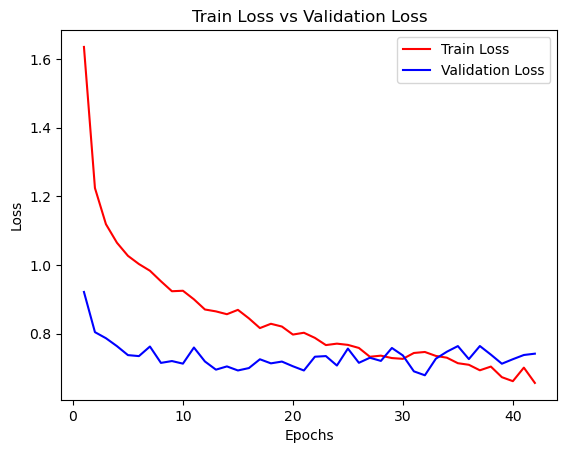

In [13]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot train loss dan validation loss
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

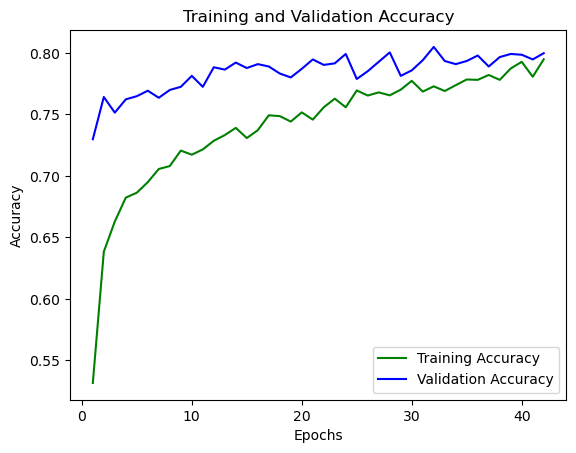

In [14]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# Evaluasi model
test_loss, test_acc = model.evaluate(validation_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

63/63 [==============================] - 7s 102ms/step - loss: 0.7417 - accuracy: 0.7997
Test Loss: 0.7416954040527344
Test Accuracy: 0.7997457385063171


In [19]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

best_model = tf.keras.models.load_model('bestModel.h5')

def predict_image(file, class_names):
    img = tf.keras.preprocessing.image.load_img(file, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = best_model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_probability = np.max(prediction)

    probabilities = [round(float(p), 3) for p in prediction[0]]

    for i in range(len(class_names)):
        print("Prediction probability for {0}: {1}%".format(class_names[i], probabilities[i] * 100))

    return class_names[predicted_class_index], predicted_probability

# File path
uploaded_file = '/kaggle/input/testupload/download (3).jpeg'

# Convert dict_keys to list
class_names_list = list(train_generator.class_indices.keys())

# Predict image class
predicted_class, predicted_probability = predict_image(uploaded_file, class_names_list)

print("Prediction:", predicted_class)
print("Probability:", predicted_probability)


1/1 [==============================] - 1s 1s/step
Prediction probability for ayam bakar: 0.0%
Prediction probability for bibimbap: 0.0%
Prediction probability for chicken_curry: 0.0%
Prediction probability for chicken_wings: 0.0%
Prediction probability for croissant: 0.0%
Prediction probability for donuts: 0.0%
Prediction probability for french_fries: 0.0%
Prediction probability for gulai: 0.0%
Prediction probability for hamburger: 0.0%
Prediction probability for hot_dog: 0.0%
Prediction probability for ice_cream: 0.0%
Prediction probability for nasi goreng: 0.0%
Prediction probability for nasi padang: 0.0%
Prediction probability for onion_rings: 0.4%
Prediction probability for pancakes: 0.1%
Prediction probability for pizza: 0.0%
Prediction probability for popcorn: 0.0%
Prediction probability for ramen: 0.0%
Prediction probability for rice: 0.0%
Prediction probability for sandwiches: 0.0%
Prediction probability for seaweed_salad: 0.0%
Prediction probability for steak: 0.0%
Prediction 

In [21]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

highest_model = load_model('bestModel.h5')
# Mengumpulkan prediksi model untuk data uji
y_pred = highest_model.predict(validation_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# Mengambil label sebenarnya dari generator
y_true_labels = validation_generator.classes

# Mendapatkan nama kelas dari generator
class_names = list(validation_generator.class_indices.keys())

# Membuat classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)

# Menampilkan classification report
print(report)

63/63 [==============================] - 7s 106ms/step
               precision    recall  f1-score   support

   ayam bakar       0.06      0.04      0.05        23
     bibimbap       0.06      0.06      0.06        80
chicken_curry       0.02      0.03      0.02        80
chicken_wings       0.08      0.09      0.08        80
    croissant       0.00      0.00      0.00        24
       donuts       0.10      0.10      0.10        80
 french_fries       0.01      0.01      0.01        80
        gulai       0.00      0.00      0.00        21
    hamburger       0.04      0.05      0.05        80
      hot_dog       0.06      0.06      0.06        80
    ice_cream       0.04      0.05      0.05        80
  nasi goreng       0.00      0.00      0.00        22
  nasi padang       0.05      0.05      0.05        22
  onion_rings       0.04      0.04      0.04        80
     pancakes       0.04      0.04      0.04        80
        pizza       0.04      0.04      0.04        80
      pop

In [22]:
y_true_labels

array([ 0,  0,  0, ..., 23, 23, 23], dtype=int32)

In [23]:
y_pred_labels

array([20, 16,  5, ..., 21,  6,  3])